In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv("../dataset/data_cleaned.csv")

In [4]:
# Analisis Exploratory Data Analysis (EDA)
# Melihat 5 data teratas
print(data.head())


   Bea Dasar    Htnb    Total  Harga Barang  Berat Kiriman   Jarak (KM)
0    34000.0   960.0  34960.0      400000.0           1.00  1042.297394
1    28000.0   500.0  28500.0      200000.0           0.50    55.550328
2    19000.0     0.0  19000.0       15000.0           0.15    59.972951
3    17000.0  1920.0  18920.0      800000.0           2.60    12.435856
4    18500.0   500.0  19000.0      200000.0           1.00   123.701070


In [5]:
# Deskripsi statistik
print(data.describe())


          Bea Dasar          Htnb         Total  Harga Barang  Berat Kiriman  \
count  3.432000e+03   3432.000000  3.432000e+03  3.432000e+03    3432.000000   
mean   3.120309e+04    424.588578  3.162768e+04  2.446956e+05       1.101163   
std    9.648439e+04   1725.418239  9.776566e+04  7.140855e+05       7.033826   
min    7.000000e+03      0.000000  7.000000e+03  0.000000e+00       0.000000   
25%    9.000000e+03      0.000000  9.960000e+03  4.400000e+04       0.100000   
50%    1.350000e+04      0.000000  1.400000e+04  1.380000e+05       0.240000   
75%    3.350000e+04    500.000000  3.350000e+04  2.863575e+05       1.000000   
max    1.961000e+06  36000.000000  1.985000e+06  1.500000e+07     120.000000   

        Jarak (KM)  
count  3432.000000  
mean    282.950993  
std     356.902294  
min      12.435856  
25%      65.590906  
50%     123.701070  
75%     292.015886  
max    2381.853744  


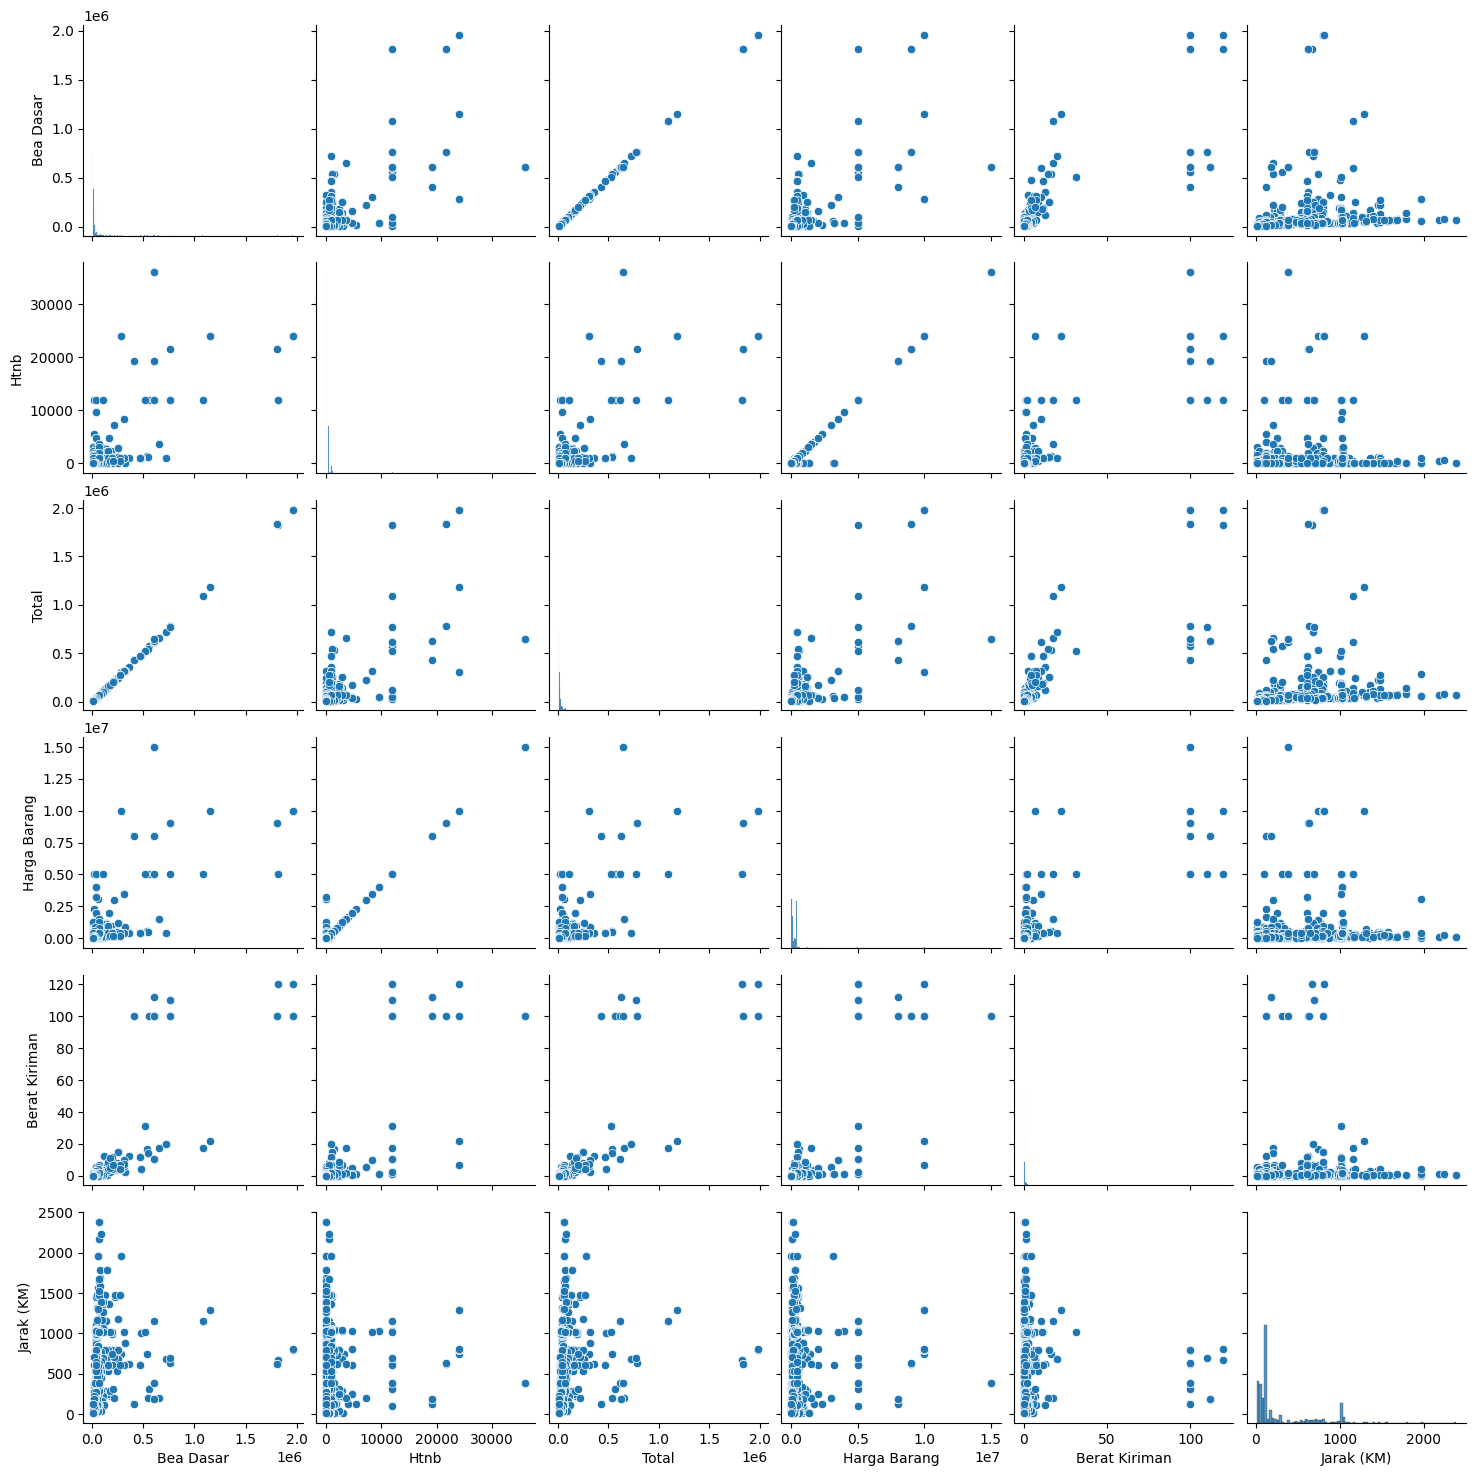

In [6]:
# Visualisasi korelasi
sns.pairplot(data)
plt.show()

In [7]:
# Cek missing value
print(data.isnull().sum())


Bea Dasar        0
Htnb             0
Total            0
Harga Barang     0
Berat Kiriman    0
Jarak (KM)       0
dtype: int64


In [8]:
# Cek missing value
print(data.isnull().sum())


Bea Dasar        0
Htnb             0
Total            0
Harga Barang     0
Berat Kiriman    0
Jarak (KM)       0
dtype: int64


In [9]:
# Pisahkan fitur (X) dan target (y)
X = data[['Harga Barang', 'Berat Kiriman', 'Jarak (KM)']]
y = data['Bea Dasar']


In [10]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Buat model regresi linear
model = LinearRegression()

In [13]:
# Latih model   

model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Prediksi pada data uji
y_pred = model.predict(X_test)


In [26]:
# Evaluasi model
print('Nilai R-squared:', r2_score(y_test, y_pred))
print('Nilai Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Nilai F1-score:', f1_score(y_test, y_pred, average='weighted'))  # Sesuaikan average jika perlu
# print(classification_report(y_test, y_pred))

Nilai R-squared: 0.7051895226753233
Nilai Mean Squared Error: 2170300787.0350986


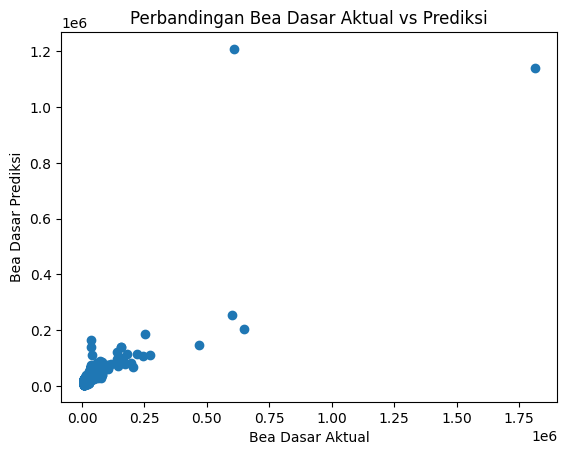

In [16]:
# Visualisasi hasil prediksi
plt.scatter(y_test, y_pred)
plt.xlabel('Bea Dasar Aktual')
plt.ylabel('Bea Dasar Prediksi')
plt.title('Perbandingan Bea Dasar Aktual vs Prediksi')
plt.show()

In [17]:
# Analisis koefisien
print('Koefisien:', model.coef_)
print('Intercept:', model.intercept_)


Koefisien: [2.12478093e-02 9.17070001e+03 4.49502942e+01]
Intercept: 2997.2118469553934


In [19]:
# Prediksi untuk data baru
data_baru = pd.DataFrame({'Harga Barang': [40000], 'Berat Kiriman': [1], 'Jarak (KM)': [1000]})
bea_dasar_prediksi = model.predict(data_baru)
print('Bea dasar prediksi:', bea_dasar_prediksi)

Bea dasar prediksi: [57968.11844984]
